# Linear Regression

Linear regression is a supervised learning method to model de relationship between a dependent variable and one or more independent variables.
Consider the general relationship between independent variables X, dependent variables Y, and some unknown parameters $\theta$:

$Y = f(X, \theta)$,

where the regression function $f(\cdot)$ is typically prescribed and the parameters $\theta$ are found by optimizing this function to match the data.
That is, the objective is to adjust the parameters $\theta$ in order to make $f(X, \theta)$ as close as possible to $Y$.

## Least Squares Fitting

The idea is to use a simple function to describe a trend by minimizing the the sum-square error between the selected function $f(\cdot)$ and its fit to the data.
Classical curve fitting is formulated as a simple solution of $y = X\theta$.

Consider a data set comprising $N$ data points:

$\lbrace y_i, x_{i1}, x_{i2}, \dots, x_{ip} \rbrace_{i=1}^N$,

where $y_i$ is the $i$-th sample of the dependent variable (also known as target variable), $x_{ij}$ is the $i$-th sample of the $j$-th component of the independent variable (also known as feature sample), and $p$ is the number of parameters.

Assume now that a linear relationship between the dependent variable, $y$, and the features, $x$, modeled as

$y_i = \theta_0 + \theta_1 x_{i1} + \dots +  \theta_p x_{ip} + \eta_i$, (1)

where $\theta_i$ is the $i$-th model parameter, and $\eta_i$ is the $i$-th disturbance sample.

Using matrix notation, (1) may be rewritten as:

$y = X\theta + \eta$,

where $y = [ y_1, y_2, \dots, y_n ]^T$ is the target vector, $\theta = [\theta_0, \theta_1, \dots, \theta_n]^T$ is the parameter vector, $X = \begin{bmatrix} 1 & x_{11} & \dots &  x_{1p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \dots &  x_{np} \end{bmatrix}$ is the feature matrix, and $\eta = [\eta_0, \eta_1, \dots, \eta_n]^T$ is the disturbance vector.

A predictor for $y_i$ is given by

$\hat y_i = \hat\theta_0 + \hat\theta_1 x_{i1} + \dots +  \hat\theta_p x_{ip}$

and rewritten using matrix notation as

$\hat y = X\hat\theta = f(X,\hat\theta)$, (2) 

where $f(X,\hat\theta)$ is the also know as hypothesis function.

The idea is to find an estimate for $\hat\theta$ in order to make the predicted target vector $\hat y$ as close as possible to the measured target vector $y$ (prediction error in system identification).
A common metric to be used in this case is the $l_2$ (least-squares) norm.
In this case, the optimization problem is formulated as

$E_2(\hat y) = \left( \frac{1}{N} \sum_{k=1}^N \lvert \hat y_k - y_k \rvert^2 \right)^{1/2}$,

which can be rewritten replacing (2) int it, arriving to

$$
\begin{align}
    E_2(f(X,\hat\theta)) &= \left( \frac{1}{N} \sum_{k=1}^N \lvert f(X_k,\hat\theta) - y_k \rvert^2 \right)^{1/2} \\
    E_2(\hat\theta) &= \left( \frac{1}{N} \sum_{k=1}^N \lvert X_k\hat\theta - y_k \rvert^2 \right)^{1/2}
\end{align}
$$

There is a closed-form solution that minimizes that cost function, it is called the normal equation and is given by

$\hat\theta = \left(X^T X\right)^{-1} X^T y$.

Below follows a simple example to estimate the parameters vector $\hat\theta$ using the normal equation (using the numpy library) and the Scikit-Learn library in Python.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Generating the data
x = 2*np.random.rand(100,1)
eta = np.random.rand(100,1)

# Desired parameters \theta_0 4 and \theta_1 = 3
y = 4 + 3*x + eta

Text(0.5, 1.0, '$y = 3x + 4 + \\eta$')

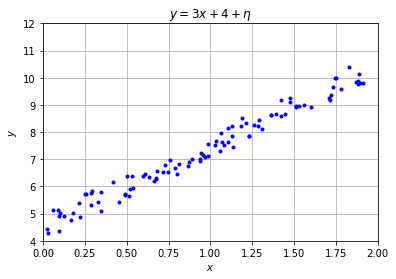

In [3]:
# Ploting the generated data
plt.plot(x, y, 'b.')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.grid(True)
plt.axis([0,2,4,12])
plt.title('$y = 3x + 4 + \eta$')

In [4]:
# Estimating the parameters
Xb = np.c_[np.ones((100,1)), x]
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)

# Generating \hat{y} from \theta
x_new = np.array([[0], [2]])
X_b_new = np.c_[np.ones((2,1)), x_new]
y_pred = X_b_new.dot(theta)
print('Prediction calculated using the normal equation')
print(f'Estimated theta: [{theta[0]}, {theta[1]}]')

Prediction calculated using the normal equation
Estimated theta: [[4.5307105], [2.9028019]]


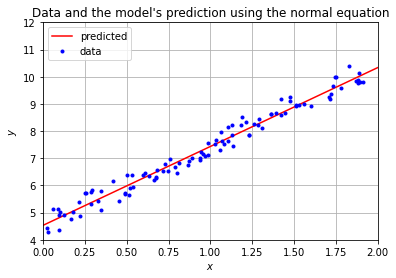

In [5]:
# Ploting the data and the model's prediction
plt.plot(x_new, y_pred, '-r', label='predicted')
plt.plot(x,y, 'b.', label='data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0,2,4,12])
plt.grid(True)
plt.legend(loc='upper left')
plt.title("Data and the model's prediction using the normal equation")
plt.show()

In [6]:
# Linear regression using Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(x, y)
theta_scikit = [lin_reg.intercept_, lin_reg.coef_]
y_pred_scikit = lin_reg.predict(x_new)
print('Prediction using Scikit-Learn')
print(f'Estimated theta: [{theta_scikit[0]}, {theta_scikit[1]}]')

Prediction using Scikit-Learn
Estimated theta: [[4.5307105], [[2.9028019]]]


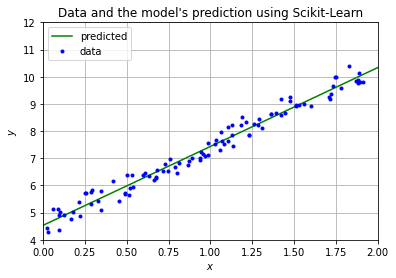

In [7]:
# Ploting the data and the model's prediction using Scikit-Learn
plt.plot(x_new, y_pred_scikit, '-g', label='predicted')
plt.plot(x,y, 'b.', label='data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0,2,4,12])
plt.grid(True)
plt.legend(loc='upper left')
plt.title("Data and the model's prediction using Scikit-Learn")
plt.show()